In [14]:
# Import Related Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Import trainset as train_set and testset as test_set
project_dir = '../Titanic/'
train_set = pd.read_csv(project_dir + 'train.csv')
test_set = pd.read_csv(project_dir + 'test.csv')

In [3]:
# Print first five rows of the trainset
train_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check data type of each feature
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Check null value of each feature
train_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Check the unique values in each feature
train_set.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
# Descriptive analysis
train_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Check if the dataset is balance or not
num_survived = train_set[train_set.Survived == 1].Survived.count()
print(f'Total number of survived passangers is {num_survived}')
print(f'Survival rate is {num_survived/len(train_set)}')

Total number of survived passangers is 342
Survival rate is 0.3838383838383838


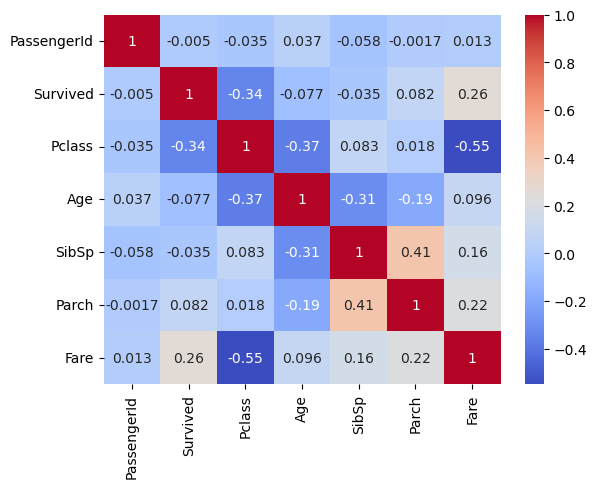

In [9]:
# Draw Correlation Matrix
correlation_matrix =train_set.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [10]:
# Select the features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = train_set[features]
y = train_set[target]

In [11]:
# One-hot encoding for categorical variables
X = pd.get_dummies(X, columns = ['Pclass', 'Sex', 'Embarked'])
# Fill null with mean
X.fillna(X.mean(), inplace=True)

In [12]:
# K-fold Cross-Validation using random forest
n_splits = 10
kf = KFold(n_splits = n_splits, shuffle = True, random_state = 42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
average_accuracy = np.mean(accuracies)
print("Average accuracy is: ", average_accuracy)
print("Standard deviation of accuracy is: ", np.std(accuracies))

Average accuracy is:  0.8114357053682897
Standard deviation of accuracy is:  0.032933596082135634


In [15]:
# Define the hyperparameters and their distributions
param_dist = {
    'n_estimators': stats.randint(100, 500),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': stats.randint(2, 11),
    'min_samples_leaf': stats.randint(1, 5)
}
# Create the classifier or model you want to tune
clf = RandomForestClassifier()
# Instantiate the RandomizedSearchCV object
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1)
# Fit the random search to your data
random_search.fit(X, y)
# Print the best hyperparameters and corresponding score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Hyperparameters: {'max_depth': 40, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 218}
Best Score: 0.832803967108154


In [20]:
# Train the model with best hyperparmeters
clf = RandomForestClassifier(max_depth = random_search.best_params_['max_depth'], min_samples_leaf = random_search.best_params_['min_samples_leaf'], min_samples_split = random_search.best_params_['min_samples_split'], n_estimators = random_search.best_params_['n_estimators'])

In [21]:
# Fit the random search to the data
clf.fit(X, y)

RandomForestClassifier(max_depth=40, min_samples_leaf=2, min_samples_split=7,
                       n_estimators=218)

In [22]:
# Select the features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test_set = test_set[features]
# One-hot encoding for categorical variables
X_test_set = pd.get_dummies(X_test_set, columns = ['Pclass', 'Sex', 'Embarked'])
# Fill null with mean
X_test_set.fillna(X.mean(), inplace=True)

In [23]:
# Predict
y_test_pred = clf.predict(X_test_set)

In [25]:
# Append the predicted results to the testset
test_set['Survived'] = y_test_pred

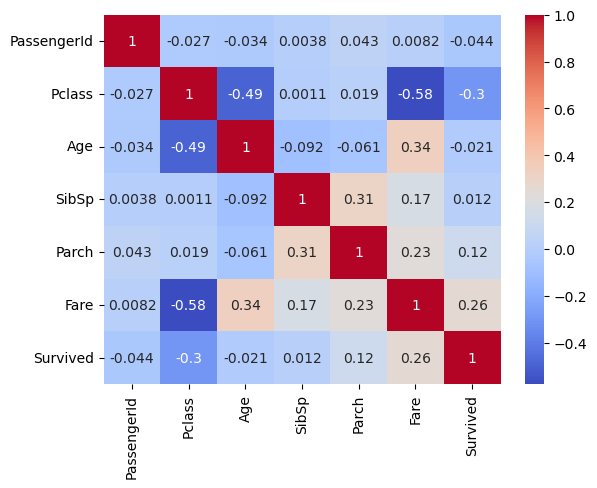

In [27]:
# Draw Correlation Matrix
correlation_matrix =test_set.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [28]:
# Calculate the survival rate of the prediction
num_survived = test_set[test_set.Survived == 1].Survived.count()
print(f'Total number of predicted survived passangers is {num_survived}')
print(f'Survival rate is {num_survived/len(test_set)}')

Total number of predicted survived passangers is 145
Survival rate is 0.34688995215311


In [30]:
Output = test_set[['PassengerId', 'Survived']]

In [33]:
Output.to_csv(project_dir + 'Prediction.csv', index = False)